In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.metrics import f1_score, accuracy_score

from sklearn.metrics import classification_report

from interpret.blackbox import LimeTabular
from interpret import show
import shap
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df = pd.read_csv('CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
df.shape

(308854, 19)

In [4]:
df.isnull().sum()/df.shape[0] * 100

General_Health                  0.0
Checkup                         0.0
Exercise                        0.0
Heart_Disease                   0.0
Skin_Cancer                     0.0
Other_Cancer                    0.0
Depression                      0.0
Diabetes                        0.0
Arthritis                       0.0
Sex                             0.0
Age_Category                    0.0
Height_(cm)                     0.0
Weight_(kg)                     0.0
BMI                             0.0
Smoking_History                 0.0
Alcohol_Consumption             0.0
Fruit_Consumption               0.0
Green_Vegetables_Consumption    0.0
FriedPotato_Consumption         0.0
dtype: float64

In [5]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


# EDA

In [6]:
df_no_disease = df[df['Heart_Disease'] == 'No']
df_yes_disease = df[df['Heart_Disease'] == 'Yes']

Text(0.5, 0.98, 'General Health')

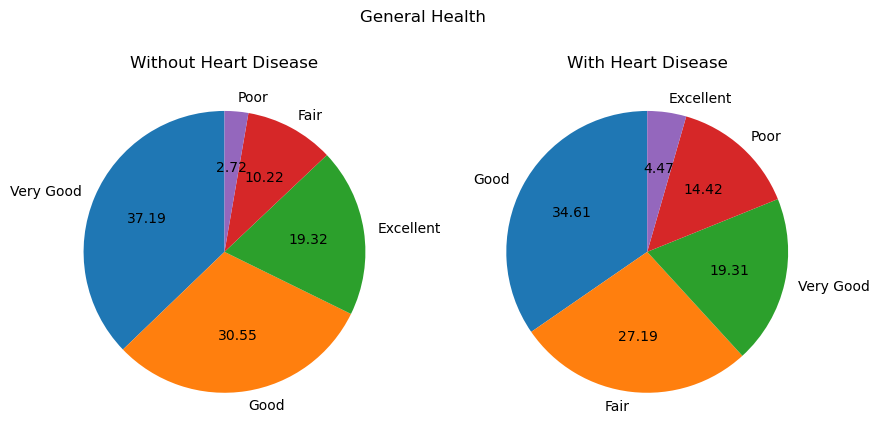

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].pie(df_no_disease['General_Health'].value_counts(), 
           labels = df_no_disease['General_Health'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[0].set_title('Without Heart Disease')


axs[1].pie(df_yes_disease['General_Health'].value_counts(), 
           labels = df_yes_disease['General_Health'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[1].set_title('With Heart Disease')

plt.suptitle('General Health')

Text(0.5, 0.98, 'Checkup')

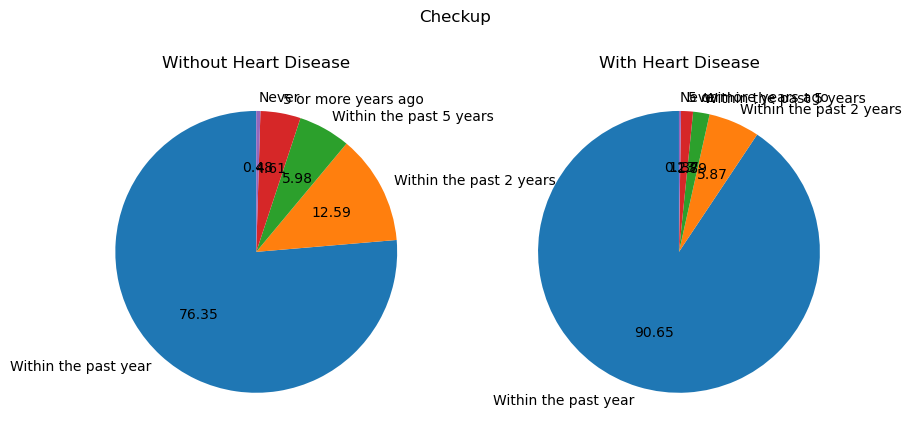

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].pie(df_no_disease['Checkup'].value_counts(), 
           labels = df_no_disease['Checkup'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[0].set_title('Without Heart Disease')


axs[1].pie(df_yes_disease['Checkup'].value_counts(), 
           labels = df_yes_disease['Checkup'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[1].set_title('With Heart Disease')

plt.suptitle('Checkup')

Text(0.5, 0.98, 'Exercise')

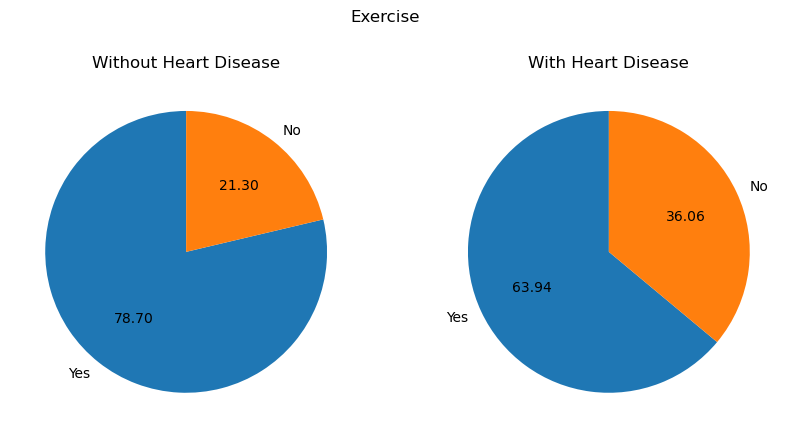

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].pie(df_no_disease['Exercise'].value_counts(), 
           labels = df_no_disease['Exercise'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[0].set_title('Without Heart Disease')


axs[1].pie(df_yes_disease['Exercise'].value_counts(), 
           labels = df_yes_disease['Exercise'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[1].set_title('With Heart Disease')

plt.suptitle('Exercise')

Text(0.5, 0.98, 'Skin Cancer')

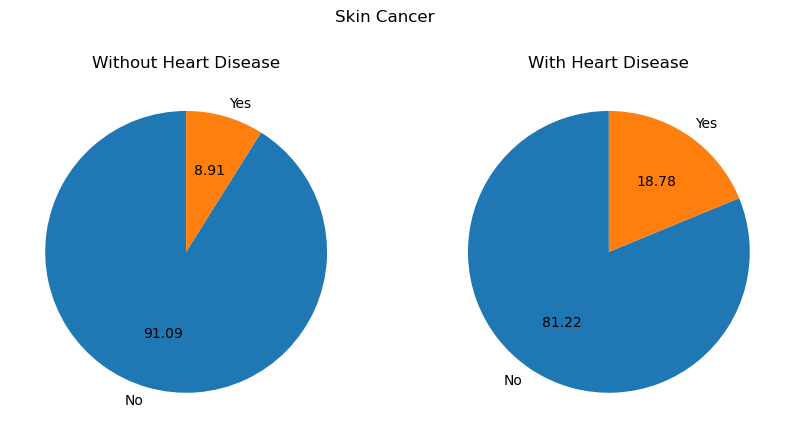

In [10]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].pie(df_no_disease['Skin_Cancer'].value_counts(), 
           labels = df_no_disease['Skin_Cancer'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[0].set_title('Without Heart Disease')


axs[1].pie(df_yes_disease['Skin_Cancer'].value_counts(), 
           labels = df_yes_disease['Skin_Cancer'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[1].set_title('With Heart Disease')

plt.suptitle('Skin Cancer')

Text(0.5, 0.98, 'Other Cancer')

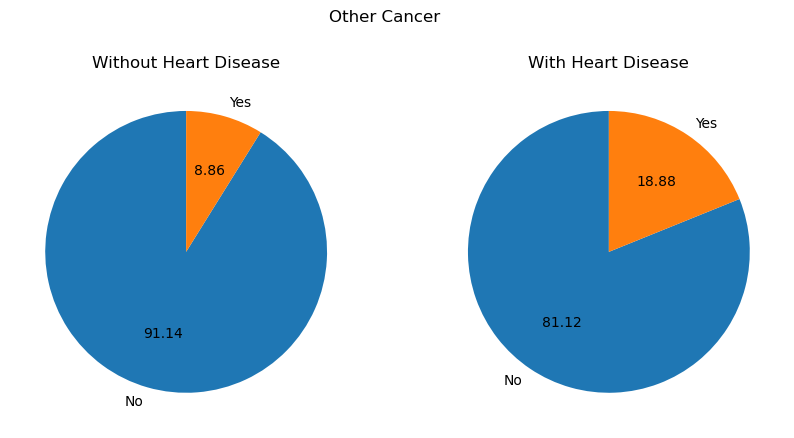

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].pie(df_no_disease['Other_Cancer'].value_counts(), 
           labels = df_no_disease['Other_Cancer'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[0].set_title('Without Heart Disease')


axs[1].pie(df_yes_disease['Other_Cancer'].value_counts(), 
           labels = df_yes_disease['Other_Cancer'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[1].set_title('With Heart Disease')

plt.suptitle('Other Cancer')

Text(0.5, 0.98, 'Depression')

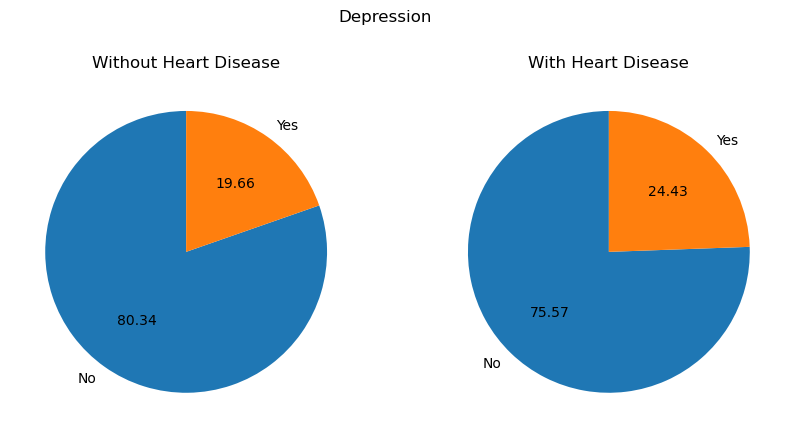

In [12]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].pie(df_no_disease['Depression'].value_counts(), 
           labels = df_no_disease['Depression'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[0].set_title('Without Heart Disease')


axs[1].pie(df_yes_disease['Depression'].value_counts(), 
           labels = df_yes_disease['Depression'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[1].set_title('With Heart Disease')

plt.suptitle('Depression')

Text(0.5, 0.98, 'Diabetes')

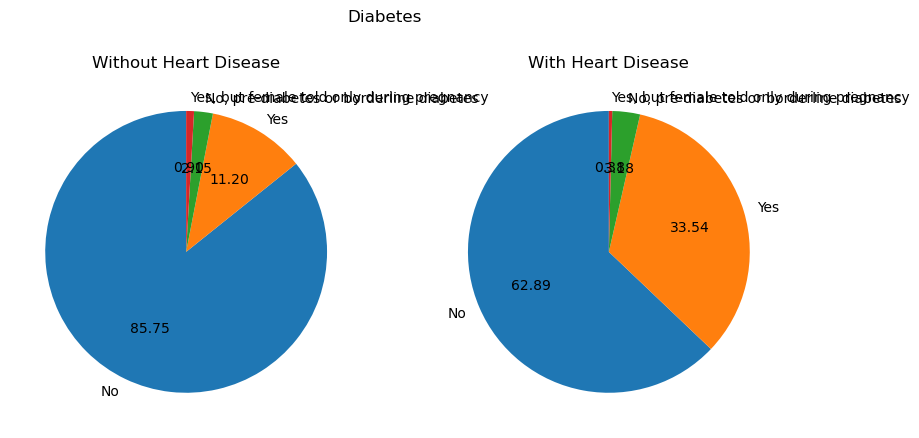

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].pie(df_no_disease['Diabetes'].value_counts(), 
           labels = df_no_disease['Diabetes'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[0].set_title('Without Heart Disease')


axs[1].pie(df_yes_disease['Diabetes'].value_counts(), 
           labels = df_yes_disease['Diabetes'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[1].set_title('With Heart Disease')

plt.suptitle('Diabetes')

Text(0.5, 0.98, 'Arthritis')

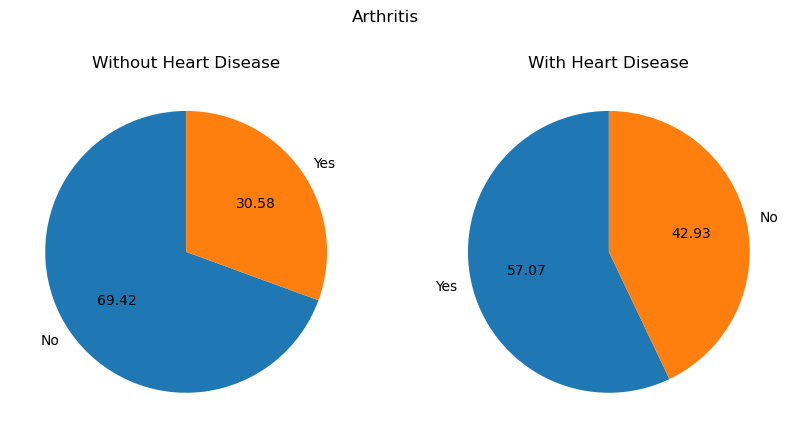

In [14]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].pie(df_no_disease['Arthritis'].value_counts(), 
           labels = df_no_disease['Arthritis'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[0].set_title('Without Heart Disease')


axs[1].pie(df_yes_disease['Arthritis'].value_counts(), 
           labels = df_yes_disease['Arthritis'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[1].set_title('With Heart Disease')

plt.suptitle('Arthritis')

Text(0.5, 0.98, 'Sex')

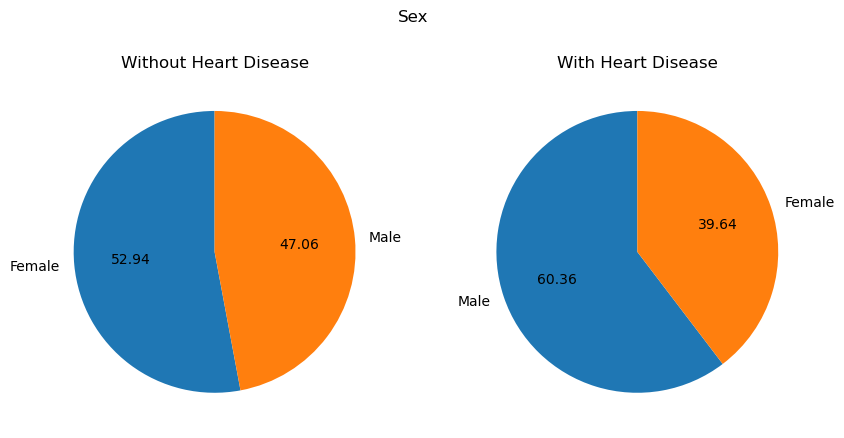

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].pie(df_no_disease['Sex'].value_counts(), 
           labels = df_no_disease['Sex'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[0].set_title('Without Heart Disease')


axs[1].pie(df_yes_disease['Sex'].value_counts(), 
           labels = df_yes_disease['Sex'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[1].set_title('With Heart Disease')

plt.suptitle('Sex')

Text(0.5, 0.98, 'Age Category')

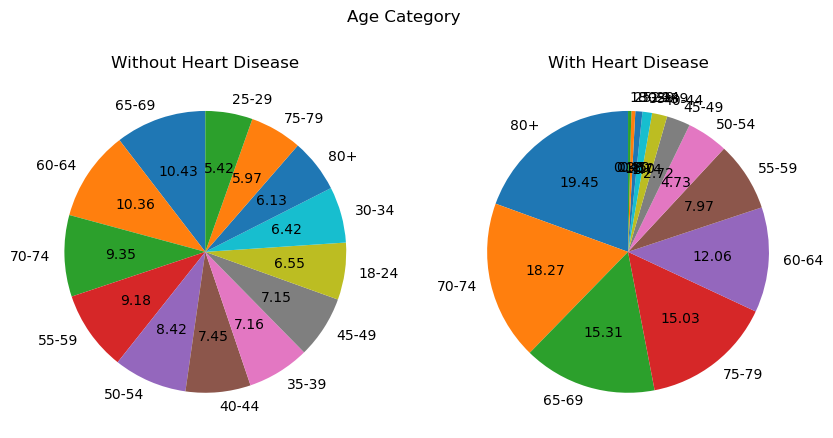

In [16]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].pie(df_no_disease['Age_Category'].value_counts(), 
           labels = df_no_disease['Age_Category'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[0].set_title('Without Heart Disease')


axs[1].pie(df_yes_disease['Age_Category'].value_counts(), 
           labels = df_yes_disease['Age_Category'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[1].set_title('With Heart Disease')

plt.suptitle('Age Category')

Text(0.5, 0.98, 'Smoking History')

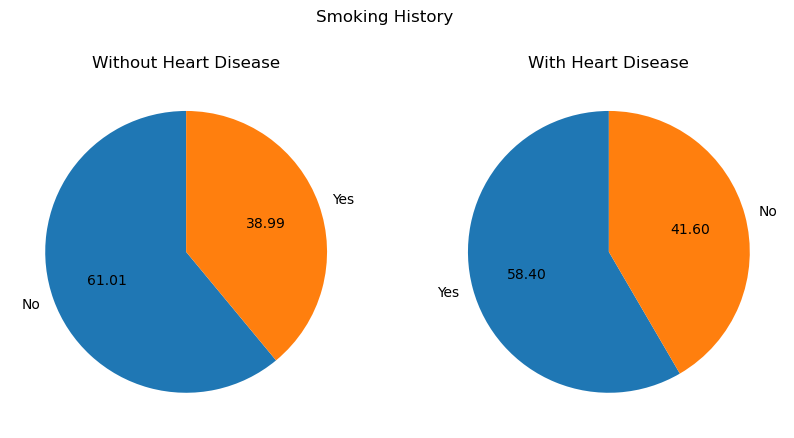

In [17]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

axs[0].pie(df_no_disease['Smoking_History'].value_counts(), 
           labels = df_no_disease['Smoking_History'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[0].set_title('Without Heart Disease')


axs[1].pie(df_yes_disease['Smoking_History'].value_counts(), 
           labels = df_yes_disease['Smoking_History'].value_counts().index.tolist(),
           autopct='%.2f', 
           startangle = 90)
axs[1].set_title('With Heart Disease')

plt.suptitle('Smoking History')

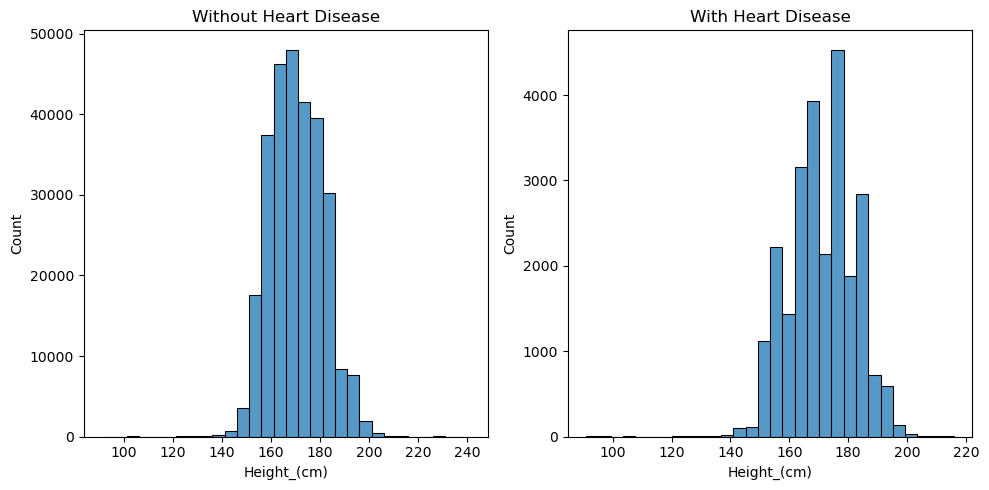

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sb.histplot(data = df_no_disease, x = "Height_(cm)", ax = axs[0], bins = 30)
axs[0].set_title("Without Heart Disease")

sb.histplot(data = df_yes_disease, x = "Height_(cm)", ax = axs[1], bins = 30)
axs[1].set_title("With Heart Disease")

plt.tight_layout()

plt.show()

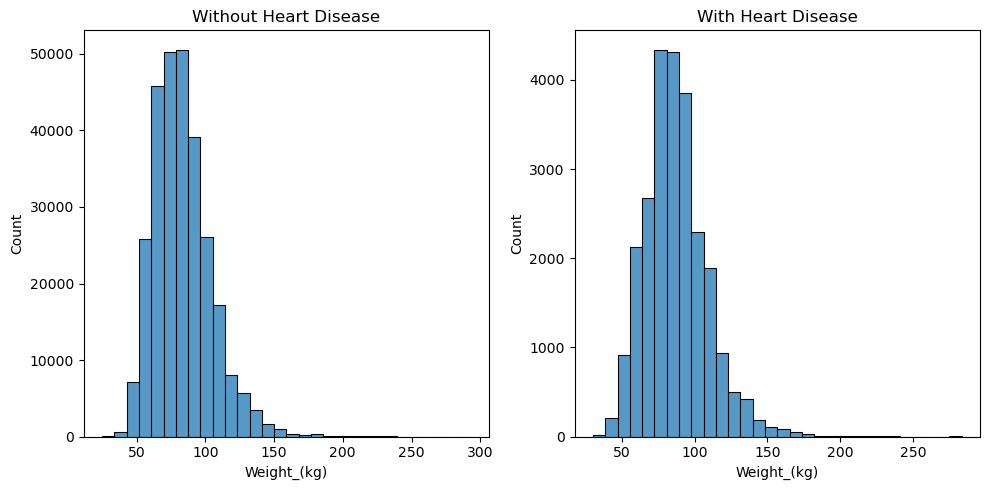

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sb.histplot(data = df_no_disease, x = "Weight_(kg)", ax = axs[0], bins = 30)
axs[0].set_title("Without Heart Disease")

sb.histplot(data = df_yes_disease, x = "Weight_(kg)", ax = axs[1], bins = 30)
axs[1].set_title("With Heart Disease")

plt.tight_layout()

plt.show()

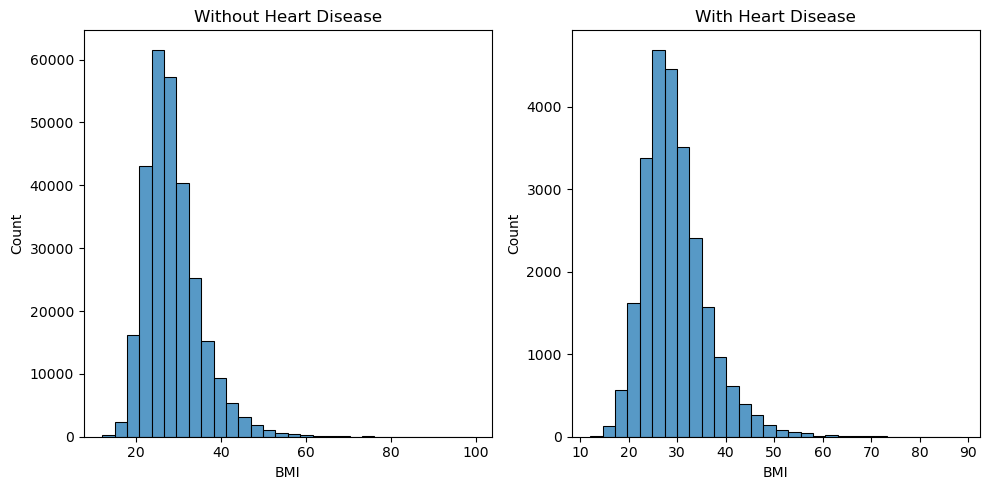

In [20]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sb.histplot(data = df_no_disease, x = "BMI", ax = axs[0], bins = 30)
axs[0].set_title("Without Heart Disease")

sb.histplot(data = df_yes_disease, x = "BMI", ax = axs[1], bins = 30)
axs[1].set_title("With Heart Disease")

plt.tight_layout()

plt.show()

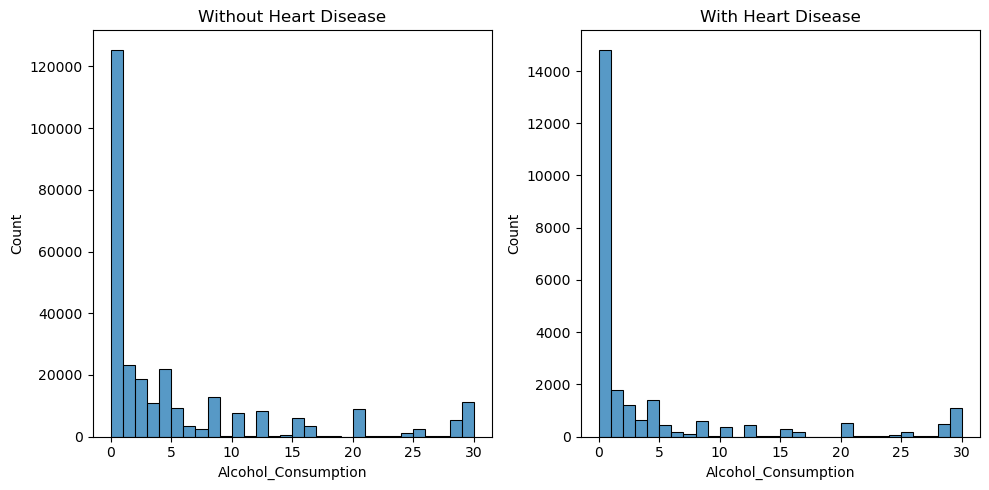

In [21]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sb.histplot(data = df_no_disease, x = "Alcohol_Consumption", ax = axs[0], bins = 30)
axs[0].set_title("Without Heart Disease")

sb.histplot(data = df_yes_disease, x = "Alcohol_Consumption", ax = axs[1], bins = 30)
axs[1].set_title("With Heart Disease")

plt.tight_layout()

plt.show()

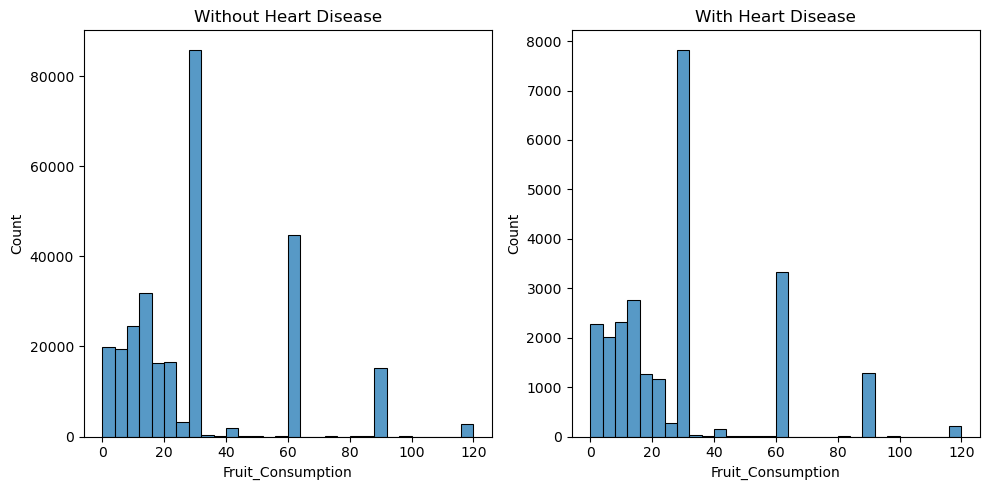

In [22]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sb.histplot(data = df_no_disease, x = "Fruit_Consumption", ax = axs[0], bins = 30)
axs[0].set_title("Without Heart Disease")

sb.histplot(data = df_yes_disease, x = "Fruit_Consumption", ax = axs[1], bins = 30)
axs[1].set_title("With Heart Disease")

plt.tight_layout()

plt.show()

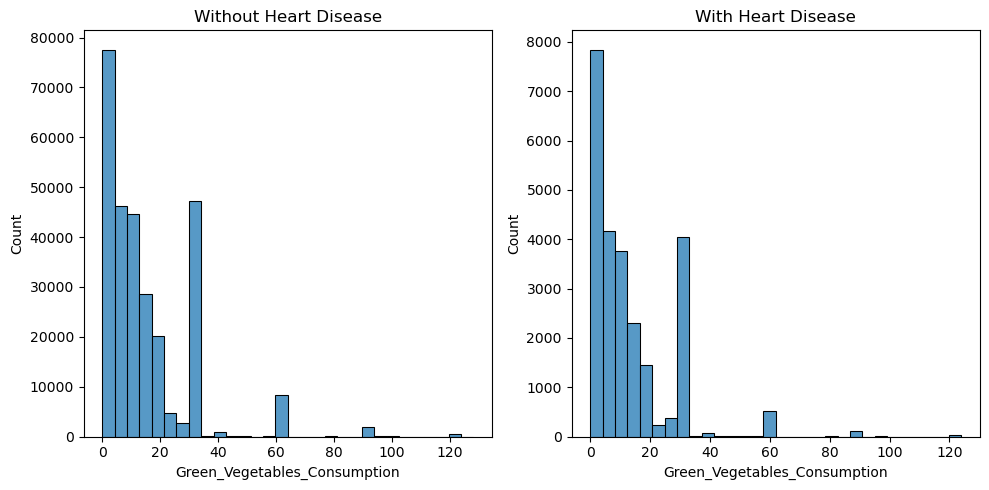

In [23]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sb.histplot(data = df_no_disease, x = "Green_Vegetables_Consumption", ax = axs[0], bins = 30)
axs[0].set_title("Without Heart Disease")

sb.histplot(data = df_yes_disease, x = "Green_Vegetables_Consumption", ax = axs[1], bins = 30)
axs[1].set_title("With Heart Disease")

plt.tight_layout()

plt.show()

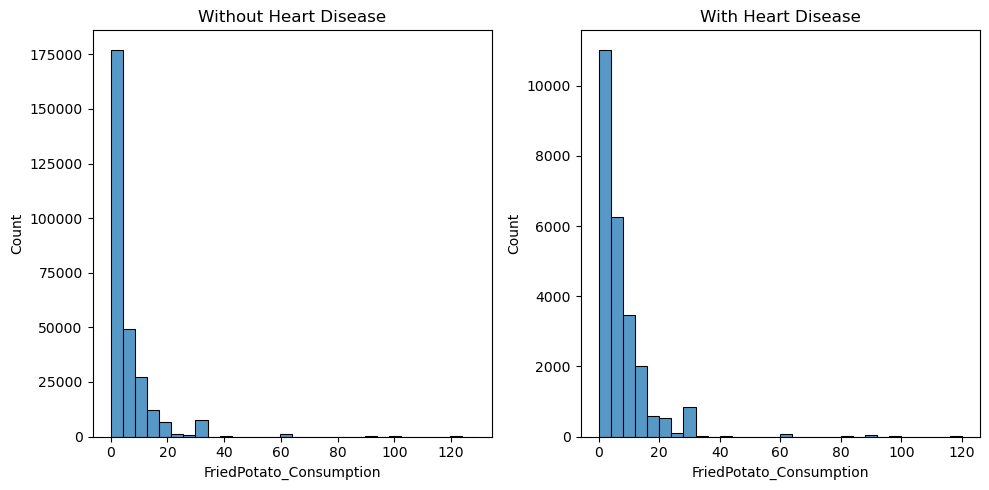

In [24]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sb.histplot(data = df_no_disease, x = "FriedPotato_Consumption", ax = axs[0], bins = 30)
axs[0].set_title("Without Heart Disease")

sb.histplot(data = df_yes_disease, x = "FriedPotato_Consumption", ax = axs[1], bins = 30)
axs[1].set_title("With Heart Disease")

plt.tight_layout()

plt.show()

# Bivariate Analysis

In [25]:
def eda_bivariate_numerical(data,column,target,color,
                    figsize=(12,6),
                    # save=True,
                    val=0,
                    target_type = 'Numerical'):

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    cmap = sb.color_palette(color)
    val = val

    for i in range(1):
        for j in range(2):
            if j==0:
                    sb.histplot(data = data,x=data[column],hue=target,
                                bins=50,kde=True,palette=color,ax=axes[j])
                    axes[j].set(xlabel=None)
                    axes[j].grid(False)
            elif j==1:
                sb.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',
                )
                axes[j].set(xlabel=None)
                axes[j].grid(False)
                val += 1
                plt.tight_layout()
            if target_type == 'Numerical':
                plt.suptitle(column)
            else:
                plt.suptitle(f'{column} vs. {target}')
    plt.show()
    
    # path = 'Figures\\Numerical\\'
    # if save:
    #     plt.savefig(f"{path}{column}.pdf",dpi=1000)


In [26]:
new_df = df
new_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


In [27]:
new_df = new_df[['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression',
                'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History'
                ]]

new_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,Yes
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,No
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,No
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,No
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,Yes


In [28]:
#label encoding
from sklearn.preprocessing import LabelEncoder
for col in new_df.columns:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])
new_df.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
0,3,2,0,0,0,0,0,0,1,0,10,1
1,4,4,0,1,0,0,0,2,0,0,10,0
2,4,4,1,0,0,0,0,2,0,0,8,0
3,3,4,1,1,0,0,0,2,0,1,11,0
4,2,4,0,0,0,0,0,0,0,1,12,1


In [29]:
from sklearn.feature_selection import chi2

X = new_df.drop(columns = ['Heart_Disease'], axis = 1)
Y = new_df['Heart_Disease']

In [30]:
chi_scores = chi2(X, Y)

In [31]:
chi_scores

(array([  129.26397606,   636.53837673,   644.89743616,  2301.55688078,
         2381.16410645,   261.25891621, 14534.21622469,  4922.24302955,
          844.22852737, 30769.19648688,  2133.3499649 ]),
 array([5.93729228e-030, 1.89145442e-140, 2.87623877e-142, 0.00000000e+000,
        0.00000000e+000, 9.12231306e-059, 0.00000000e+000, 0.00000000e+000,
        1.30707854e-185, 0.00000000e+000, 0.00000000e+000]))

<Axes: >

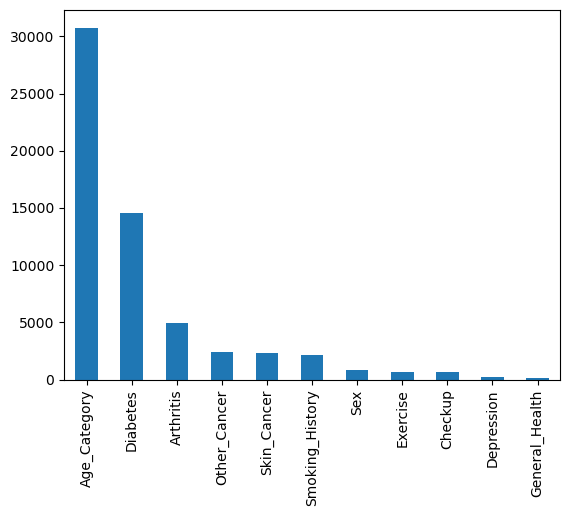

In [32]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index = X.columns)
chi_values.sort_values(ascending = False, inplace = True)
chi_values.plot.bar()

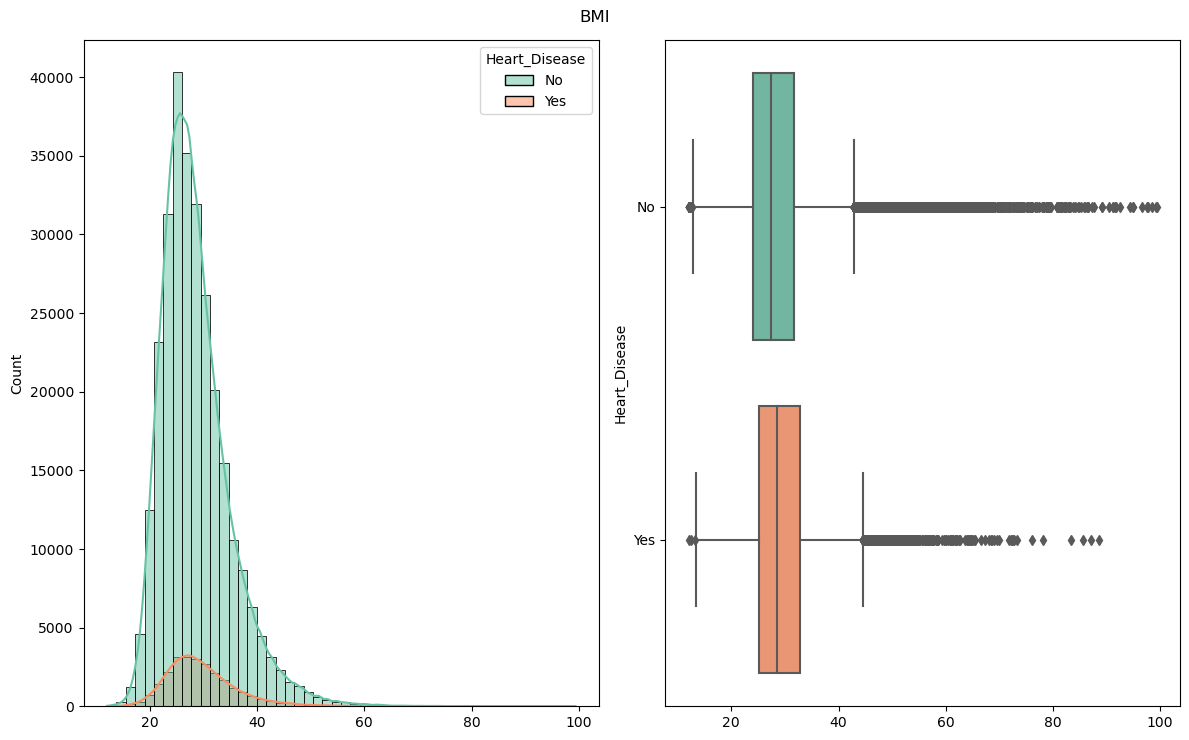

In [33]:
eda_bivariate_numerical(data = df, column = 'BMI', target = 'Heart_Disease', color = 'Set2', figsize = (12, 7.5), val=0)

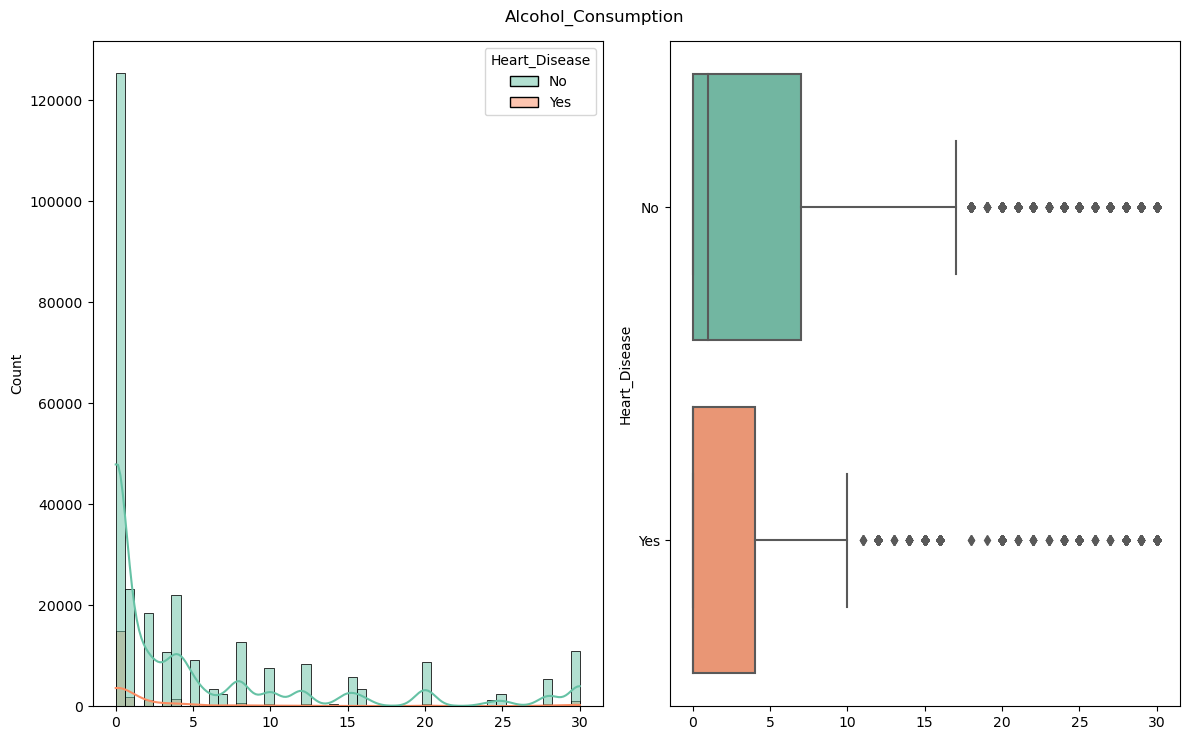

In [34]:
eda_bivariate_numerical(data = df, column = 'Alcohol_Consumption', target = 'Heart_Disease', color = 'Set2', figsize = (12, 7.5), val=0)

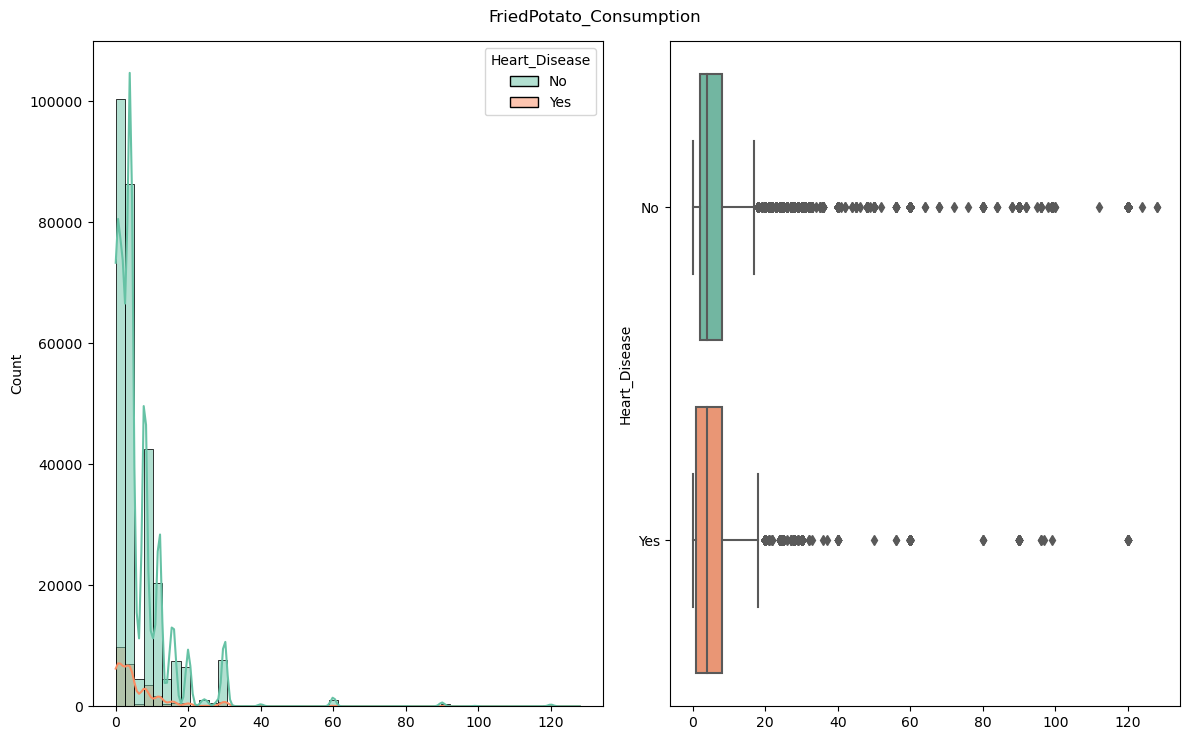

In [35]:
eda_bivariate_numerical(data = df, column = 'FriedPotato_Consumption', target = 'Heart_Disease', color = 'Set2', figsize = (12, 7.5), val=0)

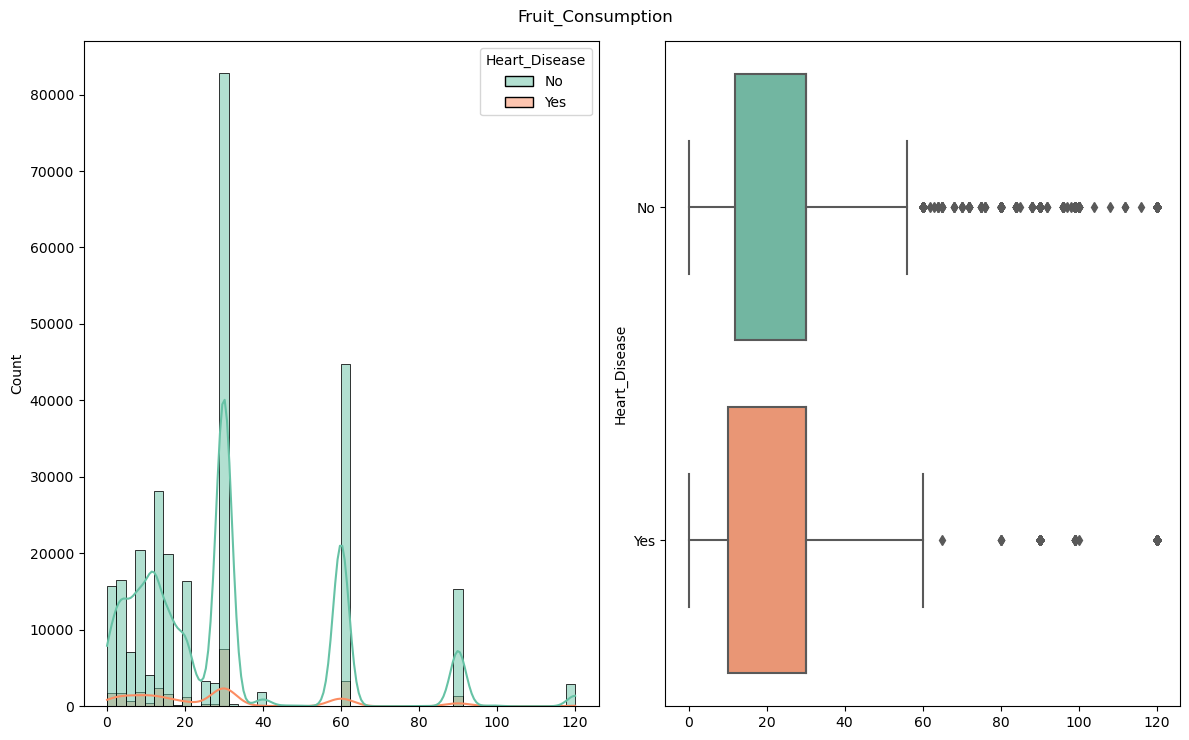

In [36]:
eda_bivariate_numerical(data = df, column = 'Fruit_Consumption', target = 'Heart_Disease', color = 'Set2', figsize = (12, 7.5), val=0)

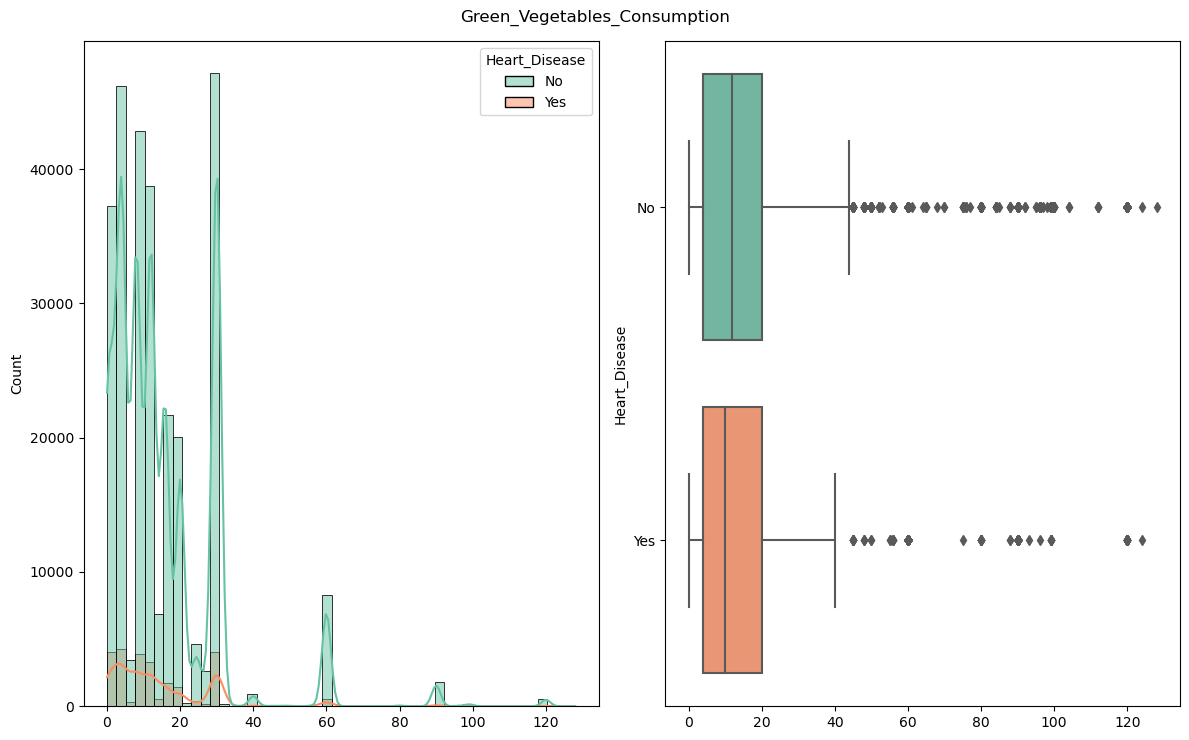

In [37]:
eda_bivariate_numerical(data = df, column = 'Green_Vegetables_Consumption', target = 'Heart_Disease', color = 'Set2', figsize = (12, 7.5), val=0)

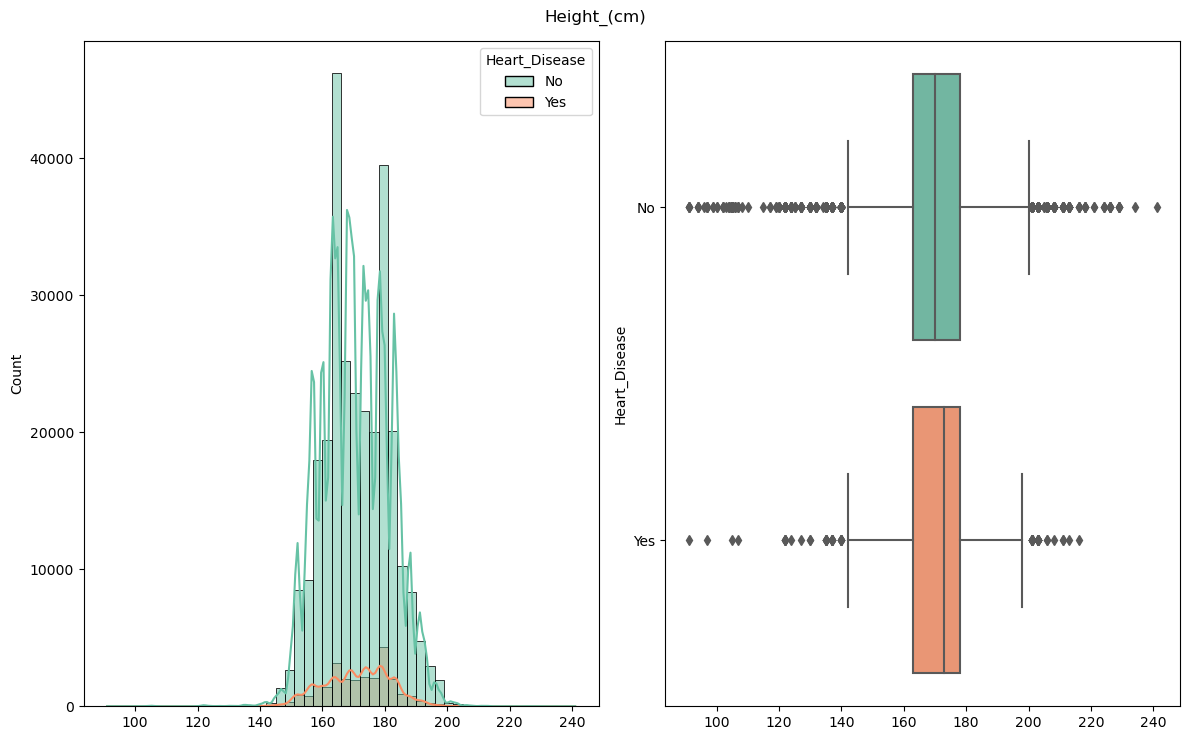

In [38]:
eda_bivariate_numerical(data = df, column = 'Height_(cm)', target = 'Heart_Disease', color = 'Set2', figsize = (12, 7.5), val=0)

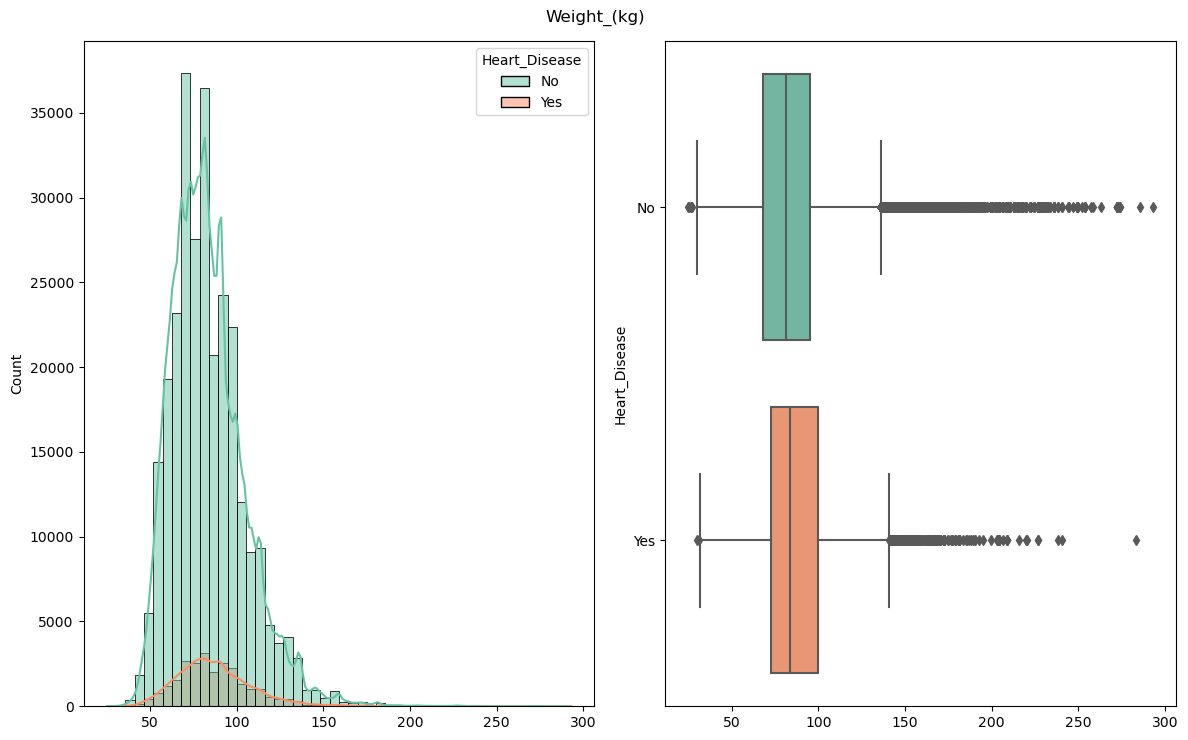

In [39]:
eda_bivariate_numerical(data = df, column = 'Weight_(kg)', target = 'Heart_Disease', color = 'Set2', figsize = (12, 7.5), val=0)

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


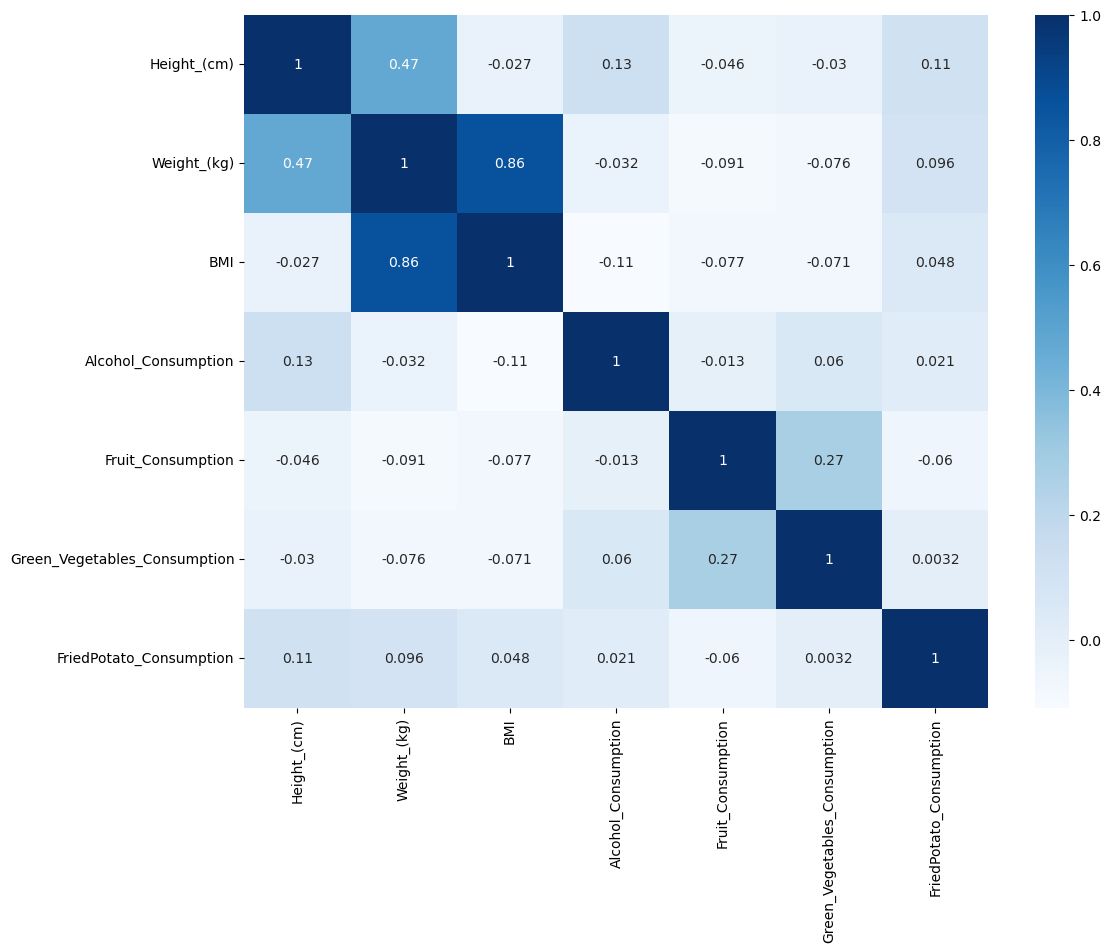

In [40]:
plt.figure(figsize = (12, 9))
sb.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

# Preprocessing

In [41]:
df['Heart_Disease'] = df['Heart_Disease'].map({'No':0,'Yes':1})
print(df['Heart_Disease'].value_counts())

0    283883
1     24971
Name: Heart_Disease, dtype: int64


### Nominal

In [42]:
ed = pd.get_dummies(df['Exercise'], prefix = "exercise")
df = pd.concat([df, ed], axis = 1)
df.drop(['Exercise'], axis = 1, inplace = True)

In [43]:
scd = pd.get_dummies(df['Skin_Cancer'], prefix = "skin_cancer")
df = pd.concat([df, scd], axis = 1)
df.drop(['Skin_Cancer'], axis = 1, inplace = True)

In [44]:
ocd = pd.get_dummies(df['Other_Cancer'], prefix = "other_cancer")
df = pd.concat([df, ocd], axis = 1)
df.drop(['Other_Cancer'], axis = 1, inplace = True)

In [45]:
dd = pd.get_dummies(df['Depression'], prefix = "depression")
df = pd.concat([df, dd], axis = 1)
df.drop(['Depression'], axis = 1, inplace = True)

In [46]:
did = pd.get_dummies(df['Diabetes'], prefix = "diabetes")
df = pd.concat([df, did], axis = 1)
df.drop(['Diabetes'], axis = 1, inplace = True)

In [47]:
ad = pd.get_dummies(df['Arthritis'], prefix = "arthritis")
df = pd.concat([df, ad], axis = 1)
df.drop(['Arthritis'], axis = 1, inplace = True)

In [48]:
sed = pd.get_dummies(df['Sex'], prefix = "sex")
df = pd.concat([df, sed], axis = 1)
df.drop(['Sex'], axis = 1, inplace = True)

In [49]:
shd = pd.get_dummies(df['Smoking_History'], prefix = "smoking_history")
df = pd.concat([df, shd], axis = 1)
df.drop(['Smoking_History'], axis = 1, inplace = True)

### Ordinal

In [50]:
df['General_Health'].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [51]:
general_health = ['Poor', 'Fair','Good', 'Very Good', 'Excellent']

In [52]:
enc = OrdinalEncoder(categories = [general_health])

In [53]:
enc.fit_transform(df[['General_Health']])

array([[0.],
       [3.],
       [3.],
       ...,
       [3.],
       [3.],
       [4.]])

In [54]:
df[['General_Health']] = enc.fit_transform(df[['General_Health']])

In [55]:
df['Checkup'].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [56]:
checkup = ['Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago','Never']

In [57]:
enc = OrdinalEncoder(categories = [checkup])

In [58]:
enc.fit_transform(df[['Checkup']])

array([[1.],
       [0.],
       [0.],
       ...,
       [3.],
       [0.],
       [0.]])

In [59]:
df[['Checkup']] = enc.fit_transform(df[['Checkup']])

In [60]:
df['Age_Category'].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [61]:
enc = OrdinalEncoder()

In [62]:
df['Age_Category'] = enc.fit_transform(df[['Age_Category']])

In [63]:
df.head()

,General_Health,Checkup,Heart_Disease,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,...,diabetes_No,"diabetes_No, pre-diabetes or borderline diabetes",diabetes_Yes,"diabetes_Yes, but female told only during pregnancy",arthritis_No,arthritis_Yes,sex_Female,sex_Male,smoking_history_No,smoking_history_Yes
0,0.0,1.0,0,10.0,150.0,32.66,14.54,0.0,30.0,16.0,...,1,0,0,0,0,1,1,0,0,1
1,3.0,0.0,1,10.0,165.0,77.11,28.29,0.0,30.0,0.0,...,0,0,1,0,1,0,1,0,1,0
2,3.0,0.0,0,8.0,163.0,88.45,33.47,4.0,12.0,3.0,...,0,0,1,0,1,0,1,0,1,0
3,0.0,0.0,1,11.0,180.0,93.44,28.73,0.0,30.0,30.0,...,0,0,1,0,1,0,0,1,1,0
4,2.0,0.0,0,12.0,191.0,88.45,24.37,0.0,8.0,4.0,...,1,0,0,0,1,0,0,1,0,1


In [64]:
df.dtypes

General_Health                                         float64
Checkup                                                float64
Heart_Disease                                            int64
Age_Category                                           float64
Height_(cm)                                            float64
Weight_(kg)                                            float64
BMI                                                    float64
Alcohol_Consumption                                    float64
Fruit_Consumption                                      float64
Green_Vegetables_Consumption                           float64
FriedPotato_Consumption                                float64
exercise_No                                              uint8
exercise_Yes                                             uint8
skin_cancer_No                                           uint8
skin_cancer_Yes                                          uint8
other_cancer_No                                        

## Splitting data

In [65]:
count_class_0, count_class_1 = df.Heart_Disease.value_counts()

df_class_0 = df[df['Heart_Disease'] == 0]
df_class_1 = df[df['Heart_Disease'] == 1]

In [66]:
df_class_0.shape

(283883, 29)

In [67]:
df_class_1.shape

(24971, 29)

In [68]:
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0)

In [69]:
print('Random under-sampling:')
print(df_test_under.Heart_Disease.value_counts())

Random under-sampling:
0    24971
1    24971
Name: Heart_Disease, dtype: int64


In [70]:
x = df_test_under.drop('Heart_Disease', axis = 1)
y = df_test_under['Heart_Disease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15, stratify = y)

In [71]:
y_train.value_counts()

1    19977
0    19976
Name: Heart_Disease, dtype: int64

# Logistic regression

In [72]:
import warnings
warnings.filterwarnings('ignore')

parameters = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-3, 3, 7),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [73]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    
                   param_grid = parameters,   
                   scoring='accuracy',        
                   cv=10)       

clf.fit(x_train, y_train)

print("Tuned Hyperparameters : ", clf.best_params_)
print("Accuracy :", clf.best_score_)

Tuned Hyperparameters :  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.7602680966323019


In [74]:
logreg = LogisticRegression(C = 0.001,
                           penalty = 'l1',
                           solver = 'liblinear')
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.7436179797777556
F1 Score:  0.7431464282882514


In [75]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).T
print(report_df)

              precision    recall  f1-score      support
0              0.766535  0.700701  0.732141  4995.000000
1              0.724322  0.786544  0.754152  4994.000000
accuracy       0.743618  0.743618  0.743618     0.743618
macro avg      0.745429  0.743622  0.743146  9989.000000
weighted avg   0.745431  0.743618  0.743145  9989.000000


## LIME

In [76]:
lime = LimeTabular(
                   model = logreg, 
                   data=x_train, 
                   random_state=1,
                   )

lime_local = lime.explain_local(x_test[-20:], 
                                y_test[-20:], 
                                name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7001/140467009557392/ -->

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

params = {
    'max_depth': [2, 4, 6, 8], 
    'min_samples_split': [2, 8, 14, 20, 30], 
    'min_samples_leaf': [2, 8, 14, 20]
}

search = GridSearchCV(clf,                    
                   param_grid = params,   
                   scoring='f1',        
                   cv=10)  

search.fit(x_train, y_train)

print("Tuned Hyperparameters : ", search.best_params_)
print("Accuracy :", search.best_score_)

Tuned Hyperparameters :  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 30}
Accuracy : 0.7664415360578614


In [78]:
dec_tree = DecisionTreeClassifier(
            max_depth = 6,
            min_samples_leaf = 14,
            min_samples_split = 2
)

dec_tree.fit(x_train, y_train)

y_pred = dec_tree.predict(x_test)
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.7560316347982781
F1 Score:  0.7553112433295753


In [79]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).T
print(report_df)

              precision    recall  f1-score      support
0              0.787287  0.701702  0.742035  4995.000000
1              0.730901  0.810372  0.768588  4994.000000
accuracy       0.756032  0.756032  0.756032     0.756032
macro avg      0.759094  0.756037  0.755311  9989.000000
weighted avg   0.759097  0.756032  0.755310  9989.000000


## LIME

In [80]:
lime = LimeTabular(
                   model = dec_tree, 
                   data=x_train, 
                   random_state=1,
                   )

lime_local = lime.explain_local(x_test[-20:], 
                                y_test[-20:], 
                                name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7001/140466955826800/ -->

# Random Forest 

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced')

rf.fit(x_train, y_train)


y_pred = rf.predict(x_test)
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.7549304234658124
F1 Score:  0.7545025897576367


In [82]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).T
print(report_df)

              precision    recall  f1-score     support
0              0.778239  0.713113  0.744254  4995.00000
1              0.735218  0.796756  0.764751  4994.00000
accuracy       0.754930  0.754930  0.754930     0.75493
macro avg      0.756729  0.754935  0.754503  9989.00000
weighted avg   0.756731  0.754930  0.754502  9989.00000


## LIME

In [83]:
lime = LimeTabular(
                   model = rf, 
                   data=x_train, 
                   random_state=1,
                   )

lime_local = lime.explain_local(x_test[-20:], 
                                y_test[-20:], 
                                name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7001/140467009556960/ -->

## SHAP

In [84]:
explainer = shap.TreeExplainer(rf)

start_index = 1
end_index = 2
shap_values = explainer.shap_values(x_test[start_index:end_index])
x_test[start_index:end_index]

,General_Health,Checkup,Age_Category,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,...,diabetes_No,"diabetes_No, pre-diabetes or borderline diabetes",diabetes_Yes,"diabetes_Yes, but female told only during pregnancy",arthritis_No,arthritis_Yes,sex_Female,sex_Male,smoking_history_No,smoking_history_Yes
26694,3.0,1.0,7.0,183.0,102.06,30.52,3.0,8.0,8.0,4.0,...,1,0,0,0,0,1,0,1,0,1


In [85]:
print(shap_values[0].shape)
shap_values

(1, 28)


[array([[ 1.26632492e-01,  4.70725893e-02,  5.93920215e-02,
         -5.32702419e-03, -1.19387432e-02, -1.18865884e-02,
          6.28220237e-03,  8.69864638e-03, -1.18933689e-03,
         -1.22633230e-02,  5.14976117e-03,  5.10335709e-03,
          5.74464576e-03,  5.74308942e-03,  1.79750494e-03,
          1.49270093e-03,  2.02396153e-03, -6.87441099e-04,
          2.61020088e-02,  4.30780752e-04,  2.64138896e-02,
         -1.16774702e-04, -6.19836147e-02, -4.80124553e-02,
         -2.34520080e-02, -2.38561921e-02, -3.66584028e-02,
         -3.09998397e-02]]),
 array([[-1.26632492e-01, -4.70725893e-02, -5.93920215e-02,
          5.32702419e-03,  1.19387432e-02,  1.18865884e-02,
         -6.28220237e-03, -8.69864638e-03,  1.18933689e-03,
          1.22633230e-02, -5.14976117e-03, -5.10335709e-03,
         -5.74464576e-03, -5.74308942e-03, -1.79750494e-03,
         -1.49270093e-03, -2.02396153e-03,  6.87441099e-04,
         -2.61020088e-02, -4.30780752e-04, -2.64138896e-02,
          1

In [86]:
prediction = rf.predict(x_test[start_index:end_index])[0]
print(f"The TF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                         shap_values[1],
                        x_test[start_index:end_index])

The TF predicted: 0


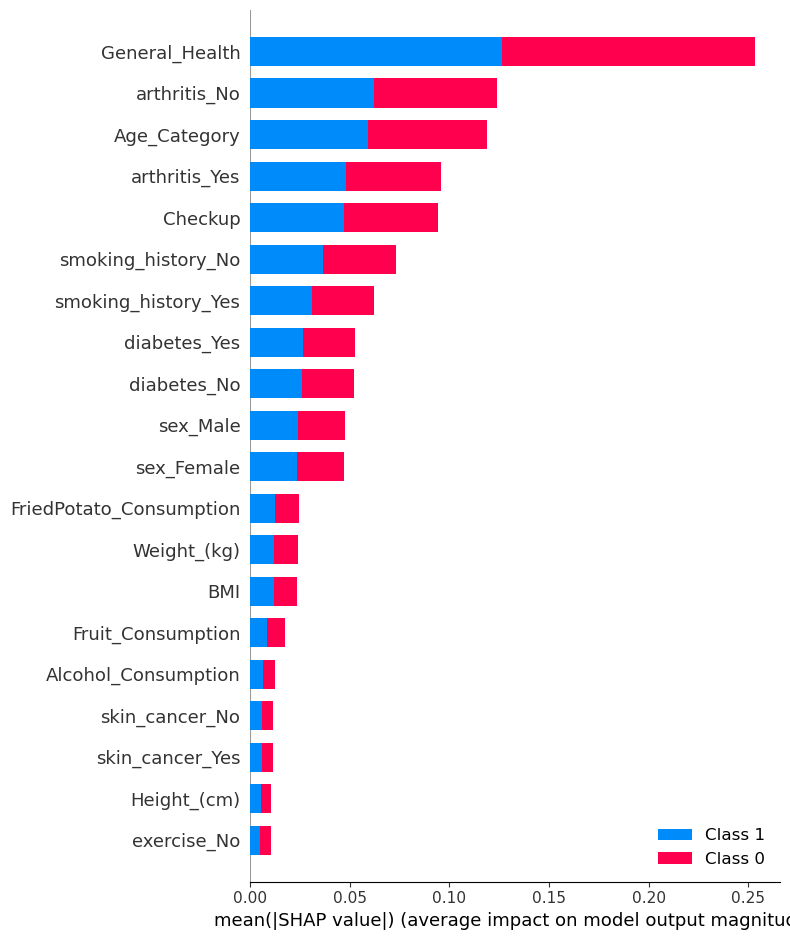

In [87]:
shap.summary_plot(shap_values, x_test)

# KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params = {
    'n_neighbors' : np.arange(1, 25),
    'weights' : ('uniform', 'distance'),
    'metric' : ('minkowski', 'chebyshev')
}


search = GridSearchCV(knn,                    
                   param_grid = params,   
                   scoring='f1',        
                   cv=10)  

search.fit(x_train, y_train)

print("Tuned Hyperparameters : ", search.best_params_)
print("Accuracy :", search.best_score_)

Tuned Hyperparameters :  {'metric': 'minkowski', 'n_neighbors': 24, 'weights': 'distance'}
Accuracy : 0.6963837011702951


In [89]:
knn = KNeighborsClassifier(n_neighbors = 24, weights = 'distance', metric = 'minkowski')

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred, average = 'macro'))

Accuracy: 0.6826509160076084
F1 Score:  0.6813222152194692


In [90]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).T
print(report_df)

              precision    recall  f1-score      support
0              0.709818  0.618018  0.660745  4995.000000
1              0.661702  0.747297  0.701900  4994.000000
accuracy       0.682651  0.682651  0.682651     0.682651
macro avg      0.685760  0.682657  0.681322  9989.000000
weighted avg   0.685763  0.682651  0.681320  9989.000000


## LIME

In [91]:
lime = LimeTabular(
                   model = knn, 
                   data=x_train, 
                   random_state=1,
                   )

lime_local = lime.explain_local(x_test[-20:], 
                                y_test[-20:], 
                                name='LIME')

show(lime_local)

<!-- http://127.0.0.1:7001/140467003238304/ -->

# XGBClassifier

In [92]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    #('encoder', TargetEncoder()),
    ('clf', XGBClassifier(random_state=8)) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=8, ...))])

In [93]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='roc_auc', random_state=8) 

In [94]:
opt.fit(x_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None, gpu_id=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       interaction_constraints=...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [95]:
opt.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.6854728136721551,
                               colsample_bynode=0.9716292421559054,
                               colsample_bytree=0.9999681720272138,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=9.269342703724346,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.4165635668761467, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=8, ...))])

In [96]:
opt.best_score_

0.8346010790274835

In [97]:
opt.score(x_test, y_test)

0.8376375374172731

In [98]:
y_pred1 = opt.predict(x_test)

In [99]:
opt.predict_proba(x_test)

array([[0.9129801 , 0.08701995],
       [0.5723914 , 0.42760858],
       [0.36147416, 0.63852584],
       ...,
       [0.9585678 , 0.0414322 ],
       [0.48150212, 0.5184979 ],
       [0.9399628 , 0.06003719]], dtype=float32)

In [100]:
opt.best_estimator_.steps

[('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.6854728136721551,
                colsample_bynode=0.9716292421559054,
                colsample_bytree=0.9999681720272138, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=9.269342703724346, gpu_id=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=0.4165635668761467, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=5, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=8, ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

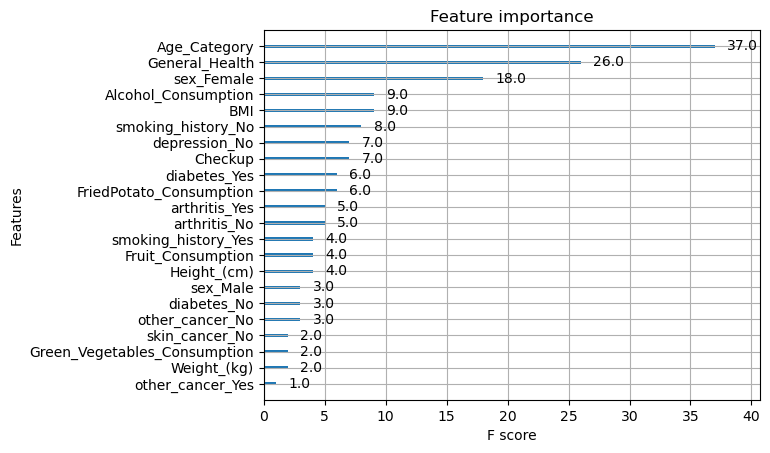

In [101]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[0]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)

In [102]:
report = classification_report(y_test, y_pred1, output_dict=True)

report_df = pd.DataFrame(report).T
print(report_df)

              precision    recall  f1-score      support
0              0.791094  0.714915  0.751078  4995.000000
1              0.739909  0.811173  0.773904  4994.000000
accuracy       0.763039  0.763039  0.763039     0.763039
macro avg      0.765502  0.763044  0.762491  9989.000000
weighted avg   0.765504  0.763039  0.762490  9989.000000
